## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
# Combine the data into a single dataset
study_data_df = pd.merge(study_results_df,mouse_metadata_df,how='left',on=['Mouse ID'])
# Display the data table for preview
study_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# study_results_uniq_df = study_results_df.drop_duplicates(['Mouse ID','Timepoint'])


In [3]:
# Checking the number of mice.
len(study_data_df['Mouse ID'].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows 
# up for Mouse ID and Timepoint. 
duplicate_rows_index = study_data_df.duplicated(subset=['Mouse ID','Timepoint'])
# finding Mouse with duplicate Time point and ID "g989"
column_name = "Mouse ID"
duplicate_mouse_ids = study_data_df.loc[duplicate_rows_index,column_name].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data_df.loc[study_data_df['Mouse ID']=='g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata_df = study_data_df.loc[study_data_df['Mouse ID']!='g989']
cleandata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(cleandata_df['Mouse ID'].unique())


248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_tum_df = cleandata_df[['Drug Regimen','Tumor Volume (mm3)']]
drug_mean = drug_tum_df.groupby('Drug Regimen').mean()
drug_median = drug_tum_df.groupby('Drug Regimen').median()
drug_var = drug_tum_df.groupby('Drug Regimen').var()
drug_std = drug_tum_df.groupby('Drug Regimen').std()
drug_sem = drug_tum_df.groupby('Drug Regimen').sem()
# study_data_df = pd.merge(study_results_df,mouse_metadata_df,how='left',on=['Mouse ID'])
summary_df1 =  pd.merge(drug_mean,drug_median, how='left',on=['Drug Regimen']).merge(drug_var,on='Drug Regimen',how='left'
).merge(drug_std,on='Drug Regimen',how='left').merge(drug_sem,on='Drug Regimen', how='left')
# summary_df1 = summary_df1.rename(columns={'Tumor Volume (mm3)_x':'Tumor Volume Mean'})
summary_df1.columns=['Volume Mean','Volume Median','Volume Variance','Volumne STD','Volume SEM']
summary_df1

,Volume Mean,Volume Median,Volume Variance,Volumne STD,Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

regimen_df = cleandata_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
regimen_df.columns=['Volume Mean','Volume Median','Volumne Variance','Volume STD','Volume SEM']
regimen_df

,Volume Mean,Volume Median,Volumne Variance,Volume STD,Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

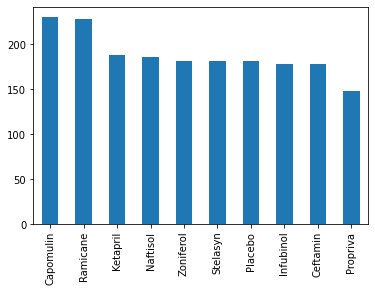

In [52]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = cleandata_df['Drug Regimen'].value_counts()
drug_count.plot(kind='bar')
plt.title('')

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# drugbar = merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['count'])
# drugbar.plot(kind='bar')


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# genderpie = merge2.groupby('Sex')['Sex'].agg(['count'])
# genderpie.plot(kind='pie',subplots=True)


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# finalt = merge.drop_duplicates('Mouse ID',keep='last')
# index = 'Ramicane'

# finalt.loc[finalt['Drug Regimen'] == index]  
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
